In [151]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [152]:
import numpy as np
grid_rows=7
grid_cols=10
wind_power=[0,0,0,1,1,1,2,2,1,0]
rand=[-1,0,1]
prob = np.array([1/3,1/3,1/3])
index = np.random.choice(rand, p = prob)
# print(wind_power[7]+rand[index])
action=[[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]]
action_4=[[-1,0],[1,0],[0,-1],[0,1]]
action_9=[[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1],[0,0]]
reward_each_step=-1
gamma=1      #discount_para
epsilon=0.1  #greedy
alpha=0.5    #stride
field=np.zeros((grid_rows,grid_cols),dtype=int)
Q=np.zeros((grid_rows,grid_cols,len(action)),dtype=float)
Q_4=np.zeros((grid_rows,grid_cols,len(action_4)),dtype=float)
Q_9=np.zeros((grid_rows,grid_cols,len(action_9)),dtype=float)
policy={}
policy_4={}
policy_9={}
policy_rows=np.zeros((grid_rows,grid_cols),dtype=int)
policy_cols=np.zeros((grid_rows,grid_cols),dtype=int)
for i in range(grid_rows):
    for j in range(grid_cols):
        policy[i,j]=[policy_rows[i,j],policy_cols[i,j]]
        p=[]
        for k in range(len(action)):
            p.append(Q[i,j,k])
        policy[i,j]=action[np.argmax(p)]
policy_rows=np.zeros((grid_rows,grid_cols),dtype=int)
policy_cols=np.zeros((grid_rows,grid_cols),dtype=int)
for i in range(grid_rows):
    for j in range(grid_cols):
        policy_4[i,j]=[policy_rows[i,j],policy_cols[i,j]]
        p=[]
        for k in range(len(action_4)):
            p.append(Q_4[i,j,k])
        policy_4[i,j]=action_4[np.argmax(p)]
policy_rows=np.zeros((grid_rows,grid_cols),dtype=int)
policy_cols=np.zeros((grid_rows,grid_cols),dtype=int)
for i in range(grid_rows):
    for j in range(grid_cols):
        policy_9[i,j]=[policy_rows[i,j],policy_cols[i,j]]
        p=[]
        for k in range(len(action_9)):
            p.append(Q_9[i,j,k])
        policy_9[i,j]=action_9[np.argmax(p)]
episode=200

In [153]:
def next_state(s,act):
    position_col=s[1]
    next_s_row=s[0]-act[1]-(wind_power[position_col]+rand[index])
    next_s_col=s[1]+act[0]
    if next_s_col<0:
        next_s_col=0
    if next_s_col>=grid_cols:
        next_s_col=grid_cols-1
    if next_s_row<0:
        next_s_row=0
    if next_s_row>=grid_rows:
        next_s_row=grid_rows-1
    return next_s_row,next_s_col

In [154]:
def epsilon_greedy_8(s):
    Q_list=[]
    for i in range(len(action)):
        Q_list.append(Q[s[0],s[1],i])
    A_max=action[np.argmax(Q_list)]
    return A_max
def epsilon_greedy_4(s):
    Q_list=[]
    for i in range(len(action_4)):
        Q_list.append(Q_4[s[0],s[1],i])
    A_max=action_4[np.argmax(Q_list)]
    return A_max
def epsilon_greedy_9(s):
    Q_list=[]
    for i in range(len(action_9)):
        Q_list.append(Q_9[s[0],s[1],i])
    A_max=action_9[np.argmax(Q_list)]
    return A_max

In [155]:
def draw_trace(T,state):
    x=[]
    y=[]
    plt.figure()
    plt.matshow(field)
    plt.grid(True)
    plt.plot(7,3,markersize=20,color='red',marker='.', linestyle='') 
    plt.plot(0,3,markersize=20,color='red',marker='.', linestyle='') 
    for t in range(T):
        x.append(state[t][0])
        y.append(state[t][1])
    plt.plot(np.transpose(y),np.transpose(x))
    plt.savefig('trace_Sarsa1.png',bbox_inches='tight')
    plt.show()

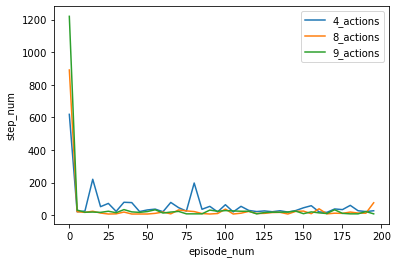

In [156]:

step_8=[]
EP_8=[]
step_4=[]
EP_4=[]
step_9=[]
EP_9=[]
for i in range(episode):
    state={}
    t=0
    R=0
    start_row=3
    start_col=0
    state[t]=[]
    state[t].append(start_row)
    state[t].append(start_col)
    curr_state=state[t]
    c=[]
    for j in range (0,len(action)):
        c.append(j)
    pr=[]  
    for k in range(len(action)):
        pr.append(1/len(action))
    if np.random.random()<epsilon:
        A=action[(np.random.choice(c, p=pr))]
    else:
        A=epsilon_greedy_8(curr_state)
    while True:
        next_s=next_state(curr_state,A)
        R+=reward_each_step
        if np.random.random()<epsilon:
            A1=action[(np.random.choice(c, p=pr))]
        else:
            A1=epsilon_greedy_8(next_s)
        Q[curr_state[0],curr_state[1],action.index(A)]+=alpha*(R+gamma*Q[next_s[0],next_s[1],action.index(A1)]-Q[curr_state[0],curr_state[1],action.index(A)])
        curr_state=next_s
        A=A1
        t+=1
        state[t]=curr_state
        if curr_state[0]==3 and curr_state[1]==7:
            break
    if i%5==0:
        # draw_trace(t+1,state)
        step_8.append(t+1)
        EP_8.append(i)


for i in range(episode):
    state={}
    t=0
    R=0
    start_row=3
    start_col=0
    state[t]=[]
    state[t].append(start_row)
    state[t].append(start_col)
    curr_state=state[t]
    c=[]
    for j in range (0,len(action_4)):
        c.append(j)
    pr=[]  
    for k in range(len(action_4)):
        pr.append(1/len(action_4))
    if np.random.random()<epsilon:
        A=action_4[(np.random.choice(c, p=pr))]
    else:
        A=epsilon_greedy_4(curr_state)
    while True:
        next_s=next_state(curr_state,A)
        R+=reward_each_step
        if np.random.random()<epsilon:
            A1=action_4[(np.random.choice(c, p=pr))]
        else:
            A1=epsilon_greedy_4(next_s)
        Q_4[curr_state[0],curr_state[1],action_4.index(A)]+=alpha*(R+gamma*Q_4[next_s[0],next_s[1],action_4.index(A1)]-Q_4[curr_state[0],curr_state[1],action_4.index(A)])
        curr_state=next_s
        A=A1
        t+=1
        state[t]=curr_state
        if curr_state[0]==3 and curr_state[1]==7:
            break
    if i%5==0:
        # draw_trace(t+1,state)
        step_4.append(t+1)
        EP_4.append(i)


for i in range(episode):
    state={}
    t=0
    R=0
    start_row=3
    start_col=0
    state[t]=[]
    state[t].append(start_row)
    state[t].append(start_col)
    curr_state=state[t]
    c=[]
    for j in range (0,len(action_9)):
        c.append(j)
    pr=[]  
    for k in range(len(action_9)):
        pr.append(1/len(action_9))
    if np.random.random()<epsilon:
        A=action_9[(np.random.choice(c, p=pr))]
    else:
        A=epsilon_greedy_9(curr_state)
    while True:
        next_s=next_state(curr_state,A)
        R+=reward_each_step
        if np.random.random()<epsilon:
            A1=action_9[(np.random.choice(c, p=pr))]
        else:
            A1=epsilon_greedy_9(next_s)
        Q_9[curr_state[0],curr_state[1],action_9.index(A)]+=alpha*(R+gamma*Q_9[next_s[0],next_s[1],action_9.index(A1)]-Q_9[curr_state[0],curr_state[1],action_9.index(A)])
        curr_state=next_s
        A=A1
        t+=1
        state[t]=curr_state
        if curr_state[0]==3 and curr_state[1]==7:
            break
    if i%5==0:
        # draw_trace(t+1,state)
        step_9.append(t+1)
        EP_9.append(i)    


plt.figure()
plt.xlabel('episode_num')
plt.ylabel('step_num')
plt.plot(EP_4,step_4,label="4_actions")
plt.plot(EP_8,step_8,label="8_actions")
plt.plot(EP_9,step_9,label="9_actions")
plt.legend()
plt.savefig('trace_Sarsa.png',bbox_inches='tight')
plt.show()
    